# Machine Learning : Linear Regression | Gradient Descent | Normal Equation

The purpose of this exercise is to understand how gradient descent and normal equation can be used to find the parameters for a linear function.


## Table of Contents


  * <a href="#1">Linear regression with one variable</a>
  * <a href="#2">Plotting the Data</a>
  * <a href="#3"> Analytical way of Linear Regression (Normal Equation)</a>
  * <a href="#4"> Plotting the Data and Prediction line with calculated best $\theta$ </a>
  * <a href="#5"> Gradient Descent</a>
  * <a href="#6"> Converging $\theta$ to optimal to achieve lowest Cost J($\theta$) </a>
  * <a href="#7"> Implementation</a>
  * <a href="#8"> Visualizing</a>
  * <a href="#9"> Conclusion</a>
  * <a href="#10"> References</a>

In [1]:
#importing libraries
import numpy as np #Arrays manipulation
import matplotlib.pyplot as plt #Visualization
plt.style.use(['ggplot']) #graphs style

<a id='1'></a>
### Linear regression with one variable
We are going to implement linear regression with only one variable to predict profits for a Pizzeria franchise. 
Suppose that we are considering different cities for opening a store. The operations chain already has restaurants in various cities and we have the data for profits and population from these cities.

We would like to use the data below to help us to select which city would be best to expand next.

- X refers to Population/City in 1000s
- y refers to the Profit/city  in $10,000s

Negative values represent on the profit section indicates loss.


In [2]:
#generating correlated dataset
X = 3 * np.random.rand(50,1)
y = 8 +7 * X+np.random.randn(50,1)

<a id='2'></a>
### Plotting the Data
Firstly, let's visualize the data using a scatter plot as we only have twovariables to plot (Population x Profit). 
This is an important step to get a felling of what is the relationship of the feature with the target. 

Will Profit increase with Population accordingly? Maybe, profit decrease as Population increase? Or maybe they wont have relationshp at all? 

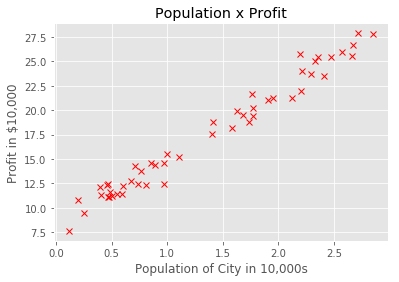

In [3]:
plt.title('Population x Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.plot(X,y,'x',color='red')

<a id='3'></a>
# Analytical way of Linear Regression (Normal Equation)

The analytical way to calculate the parameters for a Linear Regression is given by the equation below:

$\theta = (X^{T}X)^{-1}X^{T}y$

In [4]:
#Add a column of ones to X
X_best = np.c_[np.ones((50,1)),X]

theta_best = np.linalg.inv(X_best.T.dot(X_best)).dot(X_best.T).dot(y)
theta_best

array([[8.07230519],
       [6.92028859]])

<a id='4'></a>
### Plotting the Data and Prediction line with calculated best $\theta$

Text(0.5,1,'Population x Profit')

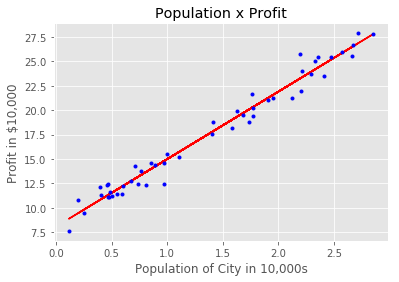

In [5]:
y_predict = X_best.dot(theta_best)

plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.title('Population x Profit')

<a id='5'></a>
# Gradient Descent
After checking the scatter plot above we  will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

The purpose of this section is to minimize the cost function with a linear regression to obtain the  $\theta_0$ and $\theta_1$ that best fit out dataset.

### Cost Function
The cost function is represented by the equation below:

$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})}^2$

### Hypothesis equation
The hypothesis $h_{\theta}(x^{(i)}$ of the equation above is given by the linear model equation for one variable below:

$h_{\theta}(x) = \theta^{T}x = \theta_0 + \theta_{1}x_1$

In [6]:
def calc_cost( theta , X, y ):
    m = len(y)
    
    #predictions of hypothesis on all m examples
    h = X.dot(theta)
    cost=(1/2*m) * np.sum(np.square(h-y))
    return cost

<a id='6'></a>
### Converging $\theta$ to optimal to achieve lowest Cost J($\theta$) 
Using the batch gradient descent algorithm below the parameters $\theta$j will come closer to the optimal values that will achieve the lowest cost J($\theta$):

$\theta_j = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}}$


\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [7]:
def gradient_descent(X , y , theta , alpha=0.01 , iterations=50):
    
    m = len(y)
    cost_history = np.zeros(iterations)         #creating vector array for iterations
    theta_history = np.zeros((iterations,2))      #creating vector array for iterations
    for i in range (iterations):
        
        h1 = np.dot(X,theta)
              
        theta = theta -(1/m)*alpha* (X.T.dot((h1-y)))
        theta_history[i,:]= theta.T
        cost_history[i]= calc_cost(theta,X,y)
        
    return theta,cost_history,theta_history

<a id='7'></a>
### Implementation
We are going to apply 1000 iterations and alpha as 0.01 for starting our tests. That will show us if $\theta_0$ and  $\theta_1$ are close enough to our Y equation.

NOTE: $\theta_0$ and  $\theta_1$ wil not be equal because of the noise that we applied when selecting our random numbers

In [8]:
lr =.01
n_iter = 1000

theta = np.random.randn(2,1)

X_best = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_best,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          7.788,
Theta1:          7.087
Final cost/MSE:  1092.337


<a id='8'></a>
### Visualizing
Finally we need to make sure that $J_{(\theta)}$ is converging to the minimal value. Also, it is important to take a note of how many iterations were necessary to converge $J_{(\theta)}$ to a minimal. We may not need to apply 1000 iterations to reach our goal.

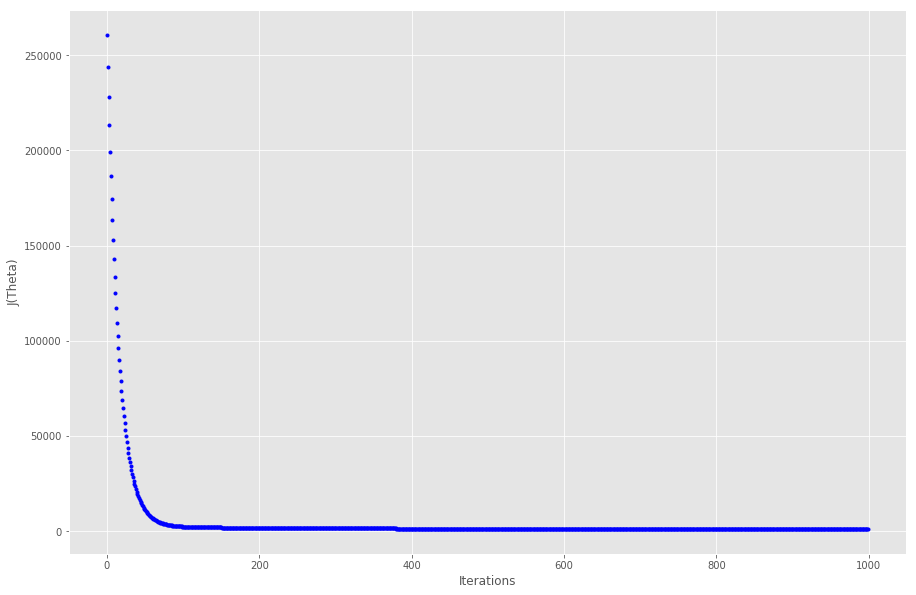

In [9]:
fig,costgraph = plt.subplots(figsize=(15,10))

costgraph.set_ylabel('J(Theta)')
costgraph.set_xlabel('Iterations')
_=costgraph.plot(range(n_iter),cost_history,'b.')

According to the Graph above, $J_{(\theta)}$ is converging to its minimal between 0 to 100 iterations. We are going to zoom in this graph to get a clearer idea of what's going on.

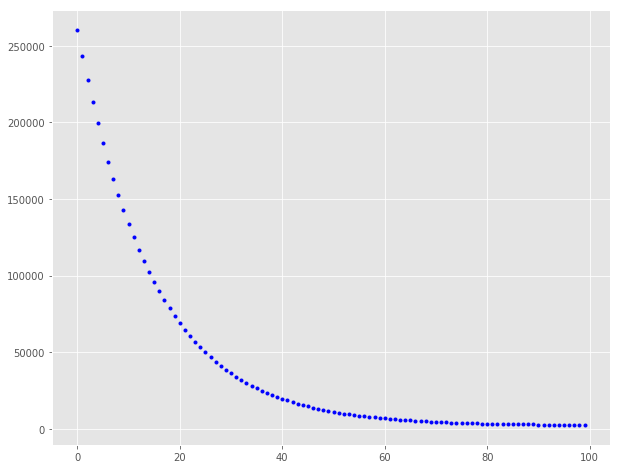

In [10]:

fig,costgraph = plt.subplots(figsize=(10,8))
_=costgraph.plot(range(100),cost_history[:100],'b.')

<a id='9'></a>
### Conclusion
Both methods (Gradient Descent and Normal equation) are important to achieve the minimal cost value and the most accurate values of the parameters.

Below we can see the differences between both methods:

| Gradient Descent |  Normal Equation |
|:----------:|:-------------:|
| Need to choose $\alpha$ |  Don't need to choose $\alpha$ |
| Needs many iterations |  Don't need to iterate |
| Works well even when n(number of features) is large |  Need to compute $(X^{T}X)^{-1}$ |
| Need to scale and normalize |  Slow if n is very large |

<a id='10'></a>
### References

- https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f | Sagar Mainkar

- https://www.coursera.org/learn/machine-learning/home/welcome | Andrew Ng
